<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Uttar%20Pradesh/CongressUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 538 (delta 48), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (538/538), 24.79 MiB | 32.17 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [7]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"congress UP"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('congress_UP.csv',index = False)

Streaming output truncated to the last 5000 lines.
False
@Jvlmk @vidya_balan They just don't know when to give up... They should realise that whatever they want to do will not happen. They are still living before 2014. This is not Congress sarkar.
JamesFluffy007

Twitter for Android
2
4
115
0
<--------------------------------------------------->
11445
2020-11-15 17:55:44
1328033961315069952
False
@TrueFactsStated Last I heard the gentrification waves were even reaching Anacostia, so you might need to take them a bit further afield to get the intended effect... say, up to Congress Heights or even out into PG County...
cooljeanius
Concord, NH
Twitter for iPhone
1
1253
5002
0
<--------------------------------------------------->
11446
2020-11-15 17:55:27
1328033891140177920
False
@SenTedCruz Lyin Ted Cruz is the worse hypocrite in Congress....  https://t.co/wGwYgoFxev
bobbystone24
Sunrise, FL
Twitter for iPhone
0
161
454
0
<--------------------------------------------------->
11447
2020-1

In [8]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11805 non-null  datetime64[ns]
 1   Tweet_id   11805 non-null  int64         
 2   Verified   11805 non-null  bool          
 3   Tweet      11805 non-null  object        
 4   User       11805 non-null  object        
 5   Location   11805 non-null  object        
 6   Source     11805 non-null  object        
 7   Likes      11805 non-null  int64         
 8   Followers  11805 non-null  int64         
 9   Following  11805 non-null  int64         
 10  Retweets   11805 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 933.9+ KB


In [10]:
df.shape

(11805, 11)

In [11]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [12]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [13]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [14]:
df['Source'].value_counts()

Twitter Web App          3942
Twitter for iPhone       3556
Twitter for Android      3029
Twitter for iPad          509
TweetDeck                 197
                         ... 
Stray Animals Austin        1
Albatross for Twitter       1
HW news english             1
Zoho Social                 1
                            1
Name: Source, Length: 97, dtype: int64

In [15]:
df['Location'].nunique()

3343

In [16]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

11805

In [17]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


11648

In [18]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [19]:
df['Tweet'].duplicated().sum()

157

In [20]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(11648, 11)

In [21]:
df['Tweet'].duplicated().sum()

0

In [22]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [24]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [25]:
df.shape

(11648, 12)

In [26]:
df['Processed_Tweet']

0        Do nothing senate? Seriously? @SpeakerPelosi p...
1        Returning to the #JCPOA means a return to the ...
2        A child on a double murder charge? For congres...
3        @SimonTemplarPV The one guy who’s been kicking...
4        @CBS_Herridge @SFF_K2 CONGRESS WOULD NOT ALLOW...
                               ...                        
11643    If @asadowaisi is a #VoteCutter then what is @...
11644    @mtgreenee Gurl I can’t wait for Congress to s...
11645    @AOC @LindseyGrahamSC @AOC you have been in Co...
11646    The Trump administration is stepping back from...
11647    @sarahsmithF1 This was an old clip but Biden i...
Name: Processed_Tweet, Length: 11648, dtype: object

In [27]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0        Do nothing senate? Seriously? @SpeakerPelosi p...
1        Returning to the #JCPOA means a return to the ...
2        A child on a double murder charge? For congres...
3        @SimonTemplarPV The one guy who’s been kicking...
4        @CBS_Herridge @SFF_K2 CONGRESS WOULD NOT ALLOW...
                               ...                        
11643    If @asadowaisi is a #VoteCutter then what is @...
11644    @mtgreenee Gurl I can’t wait for Congress to s...
11645    @AOC @LindseyGrahamSC @AOC you have been in Co...
11646    The Trump administration is stepping back from...
11647    @sarahsmithF1 This was an old clip but Biden i...
Name: Processed_Tweet, Length: 11648, dtype: object

In [28]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0        Do nothing senate? Seriously?   please explain...
1        Returning to the #JCPOA means a return to the ...
2        A child on a double murder charge? For congres...
3          The one guy who’s been kicking their ass and...
4            CONGRESS WOULD NOT ALLOW GOVERNOR CUOMO OF...
                               ...                        
11643    If   is a #VoteCutter then what is   in UP, WB...
11644      Gurl I can’t wait for Congress to start up a...
11645          you have been in Congress for 2 years an...
11646    The Trump administration is stepping back from...
11647      This was an old clip but Biden is bringing h...
Name: Processed_Tweet, Length: 11648, dtype: object

In [29]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0        Do nothing senate? Seriously?   please explain...
1        Returning to the #JCPOA means a return to the ...
2        A child on a double murder charge? For congres...
3          The one guy who’s been kicking their ass and...
4            CONGRESS WOULD NOT ALLOW GOVERNOR CUOMO OF...
                               ...                        
11643    If   is a #VoteCutter then what is   in UP, WB...
11644      Gurl I can’t wait for Congress to start up a...
11645          you have been in Congress for 2 years an...
11646    The Trump administration is stepping back from...
11647      This was an old clip but Biden is bringing h...
Name: Processed_Tweet, Length: 11648, dtype: object

In [30]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0        Do nothing senate? Seriously?   please explain...
1        Returning to the JCPOA means a return to the p...
2        A child on a double murder charge? For congres...
3          The one guy who’s been kicking their ass and...
4            CONGRESS WOULD NOT ALLOW GOVERNOR CUOMO OF...
                               ...                        
11643    If   is a VoteCutter then what is   in UP, WB,...
11644      Gurl I can’t wait for Congress to start up a...
11645          you have been in Congress for 2 years an...
11646    The Trump administration is stepping back from...
11647      This was an old clip but Biden is bringing h...
Name: Processed_Tweet, Length: 11648, dtype: object

In [31]:
!pip install tweet-preprocessor

In [33]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0        Do nothing senate? Seriously? please explain t...
1        Returning to the JCPOA means a return to the p...
2        A child on a double murder charge? For congres...
3        The one guy whos been kicking their ass and hi...
4        CONGRESS WOULD NOT ALLOW GOVERNOR CUOMO OF NEW...
                               ...                        
11643    If is a VoteCutter then what is in UP, WB, AP,...
11644    Gurl I cant wait for Congress to start up and ...
11645    you have been in Congress for years and have y...
11646    The Trump administration is stepping back from...
11647    This was an old clip but Biden is bringing her...
Name: Processed_Tweet, Length: 11648, dtype: object

In [34]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0        Do nothing senate  Seriously  please explain t...
1        Returning to the JCPOA means a return to the p...
2        A child on a double murder charge  For congres...
3        The one guy whos been kicking their ass and hi...
4        CONGRESS WOULD NOT ALLOW GOVERNOR CUOMO OF NEW...
                               ...                        
11643    If is a VoteCutter then what is in UP  WB  AP ...
11644    Gurl I cant wait for Congress to start up and ...
11645    you have been in Congress for years and have y...
11646    The Trump administration is stepping back from...
11647    This was an old clip but Biden is bringing her...
Name: Processed_Tweet, Length: 11648, dtype: object

In [35]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0        do nothing senate  seriously  please explain t...
1        returning to the jcpoa means a return to the p...
2        a child on a double murder charge  for congres...
3        the one guy whos been kicking their ass and hi...
4        congress would not allow governor cuomo of new...
                               ...                        
11643    if is a votecutter then what is in up  wb  ap ...
11644    gurl i cant wait for congress to start up and ...
11645    you have been in congress for years and have y...
11646    the trump administration is stepping back from...
11647    this was an old clip but biden is bringing her...
Name: Processed_Tweet, Length: 11648, dtype: object

In [36]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

' jeff hauser said biden should not wait for congress to pass new laws but to look for existing laws to advance his agenda  climate regulations beefed up through clean air act    corporate excesses can be curtailed using the sherman antitrust act '

In [37]:
df['User'].value_counts()

SUNDAYPHILLIPS_    81
GOD_IS__GOOD       39
IFilmFeatures      32
Din60947484        27
realmethod41       19
                   ..
JaniceD47594123     1
KeithShanks         1
dbydenver           1
kpassa              1
Imran95758187       1
Name: User, Length: 10233, dtype: int64

In [38]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


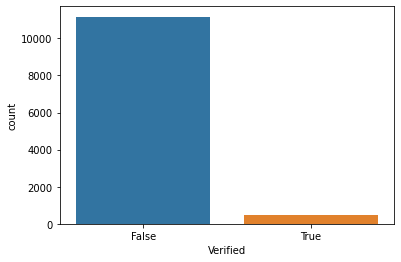

In [39]:
bar = sns.countplot(df['Verified'])

In [40]:
df['Verified'].value_counts()

False    11168
True       480
Name: Verified, dtype: int64

In [41]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

CNNnews18          11
TimesNow            7
Raviravirai         6
politico            6
republic            5
                   ..
SteveESpaulding     1
clevelanddotcom     1
rossgarber          1
natemcdermott       1
NSUINagaland        1
Name: User, Length: 393, dtype: int64

In [42]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 709, 16: 1750, 17: 1796, 18: 1972, 19: 2058, 20: 2017, 21: 1346})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

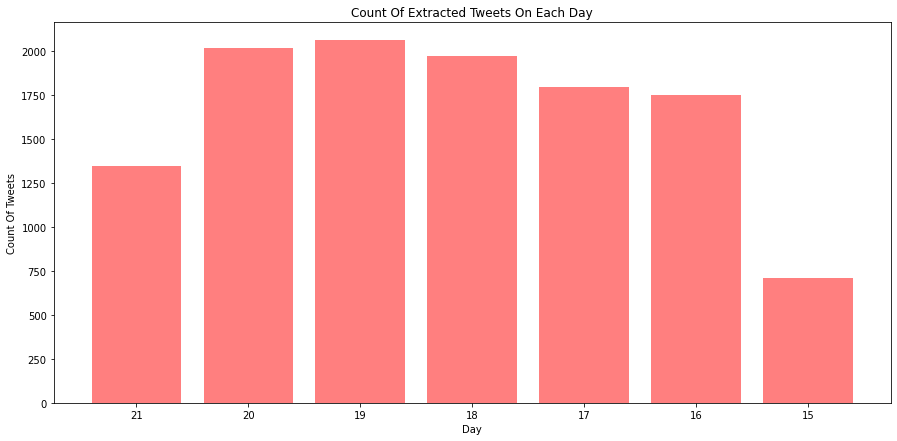

In [43]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [44]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 495,
         1: 497,
         2: 449,
         3: 501,
         4: 437,
         5: 340,
         6: 295,
         7: 216,
         8: 218,
         9: 206,
         10: 199,
         11: 260,
         12: 380,
         13: 525,
         14: 677,
         15: 685,
         16: 715,
         17: 739,
         18: 716,
         19: 754,
         20: 626,
         21: 592,
         22: 571,
         23: 555})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

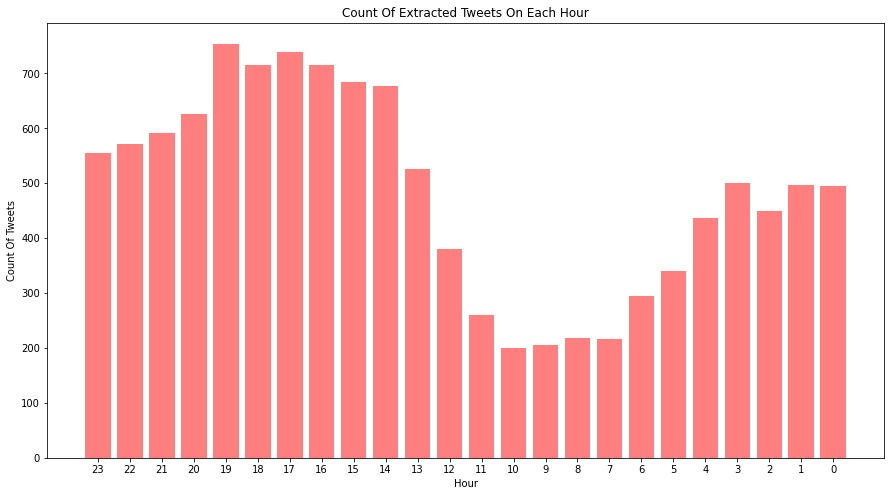

In [45]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [46]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['a', 'had', 'we', "that'll", 'any', 'd', 'themselves', 'these', 've', 'as', "doesn't", 'isn', 'most', 'the', 'weren', 'll', 'her', 'do', "wasn't", 'how', 'both', 'itself', "aren't", 'shouldn', "you've", 're', 'this', 'our', 'that', 'more', 'those', "don't", 'only', 'their', 'than', "mightn't", 'are', 'but', 'between', 'doing', 'his', 'she', "shan't", 'when', 's', 'off', 'for', 'after', 'mightn', 'through', "you're", 'where', 'myself', "hasn't", "you'll", 'further', 'here', 'have', 'they', 'down', 'against', 'can', 'what', 'few', 'being', 'up', 'nor', 'wasn', 'is', 'not', 'himself', 'on', 't', 'should', 'my', 'during', 'no', 'mustn', "should've", 'will', 'other', 'just', 'having', 'didn', 'won', 'me', 'ma', 'an', 'o', 'or', 'which', 'your', 'does', 'at', 'i', 'if', 'them', 'because', "hadn't", 'did', 'shan', "weren't", "isn't", 'whom', 'there', "won't", "mustn't", 'same', 'into', "it's", 'be', 'needn', 'were', "she's", 'too', 'hadn', 'with', 'don', 'now', 'before', 'you', 'him', 'am', 

In [49]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0        nothing senate seriously please explain ole co...
1        returning jcpoa means return pre trump nuclear...
2        child double murder charge congress really see...
3        one guy whos kicking ass alleged teammates con...
4        congress would allow governor cuomo new york t...
                               ...                        
11643    votecutter wb ap bihar orissa congress guts co...
11644    gurl cant wait congress start wear mask work e...
11645    congress years yet supply solutions creating j...
11646    trump administration stepping back negotiation...
11647    old clip biden bringing along admin ppl alread...
Name: Processed_Tweet, Length: 11648, dtype: object

In [50]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0        [nothing, senate, seriously, please, explain, ...
1        [returning, jcpoa, means, return, pre, trump, ...
2        [child, double, murder, charge, congress, real...
3        [one, guy, whos, kicking, ass, alleged, teamma...
4        [congress, would, allow, governor, cuomo, new,...
                               ...                        
11643    [votecutter, wb, ap, bihar, orissa, congress, ...
11644    [gurl, cant, wait, congress, start, wear, mask...
11645    [congress, years, yet, supply, solutions, crea...
11646    [trump, administration, stepping, back, negoti...
11647    [old, clip, biden, bringing, along, admin, ppl...
Name: Processed_Tweet, Length: 11648, dtype: object

In [52]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0        [noth, senat, seriou, plea, explain, ole, cong...
1        [return, jcpoa, mean, return, pre, trump, nucl...
2        [child, doubl, murder, charg, congress, realli...
3        [one, guy, who, kick, ass, alleg, teammat, con...
4        [congress, would, allow, governor, cuomo, new,...
                               ...                        
11643    [votecutt, wb, ap, bihar, orissa, congress, gu...
11644    [gurl, cant, wait, congress, start, wear, mask...
11645    [congress, year, yet, suppli, solut, creat, jo...
11646    [trump, administr, step, back, negoti, new, st...
11647    [old, clip, biden, bring, along, admin, ppl, a...
Name: Processed_Tweet, Length: 11648, dtype: object

In [53]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:59:42,1330299881219649536,False,Do nothing senate? Seriously? @SpeakerPelosi p...,LisaLafern,,Twitter for iPhone,0,13,166,0,"[noth, senat, seriou, plea, explain, ole, cong..."
1,2020-11-21 23:56:39,1330299116241506307,False,Returning to the #JCPOA means a return to the ...,TelStratLLC,California State of Mind,Twitter Web App,0,21,322,0,"[return, jcpoa, mean, return, pre, trump, nucl..."
2,2020-11-21 23:56:26,1330299060943802377,False,A child on a double murder charge? For congres...,raytrevisan,Sydney,Twitter for Android,0,66,179,0,"[child, doubl, murder, charg, congress, realli..."
3,2020-11-21 23:55:00,1330298699881254914,False,@SimonTemplarPV The one guy who’s been kicking...,garysteveneaton,SoCal,Twitter for iPhone,1,3420,1456,0,"[one, guy, who, kick, ass, alleg, teammat, con..."
4,2020-11-21 23:54:55,1330298677878001664,False,@CBS_Herridge @SFF_K2 CONGRESS WOULD NOT ALLOW...,DrKevinJMaloney,Mamaroneck New York,Twitter Web App,1,29,275,1,"[congress, would, allow, governor, cuomo, new,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11643,2020-11-15 12:07:48,1327946398591946752,False,If @asadowaisi is a #VoteCutter then what is @...,itsvikasreddy,,Twitter for Android,0,34,25,1,"[votecutt, bihar, orissa, congress, gut, conte..."
11644,2020-11-15 12:05:38,1327945856146923520,False,@mtgreenee Gurl I can’t wait for Congress to s...,prahme,NewYork on my mind,Twitter for iPhone,0,75,366,0,"[gurl, cant, wait, congress, start, wear, mask..."
11645,2020-11-15 12:04:33,1327945582875455488,False,@AOC @LindseyGrahamSC @AOC you have been in Co...,marian_olivei,,Twitter for Android,0,3,43,0,"[congress, year, yet, suppli, solut, creat, jo..."
11646,2020-11-15 12:00:02,1327944444906262529,False,The Trump administration is stepping back from...,CEDuncan70,"North Carolina, USA",Twitter Web App,0,513,2763,0,"[trump, administr, step, back, negoti, new, st..."


In [54]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

207043

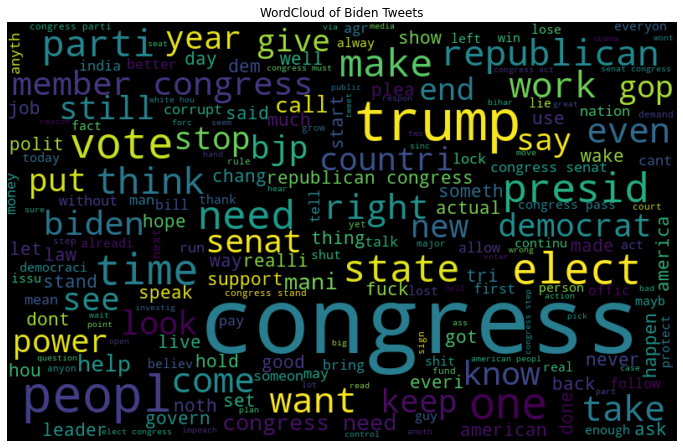

In [55]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Biden Tweets")
plt.show()

In [56]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

11648

In [57]:
len(text)

207043

In [58]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 4950
Negative Tweets: 2791
Neutral Tweets 3907


In [59]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [61]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.126,0.874,0.000,-0.3818
1,0.057,0.840,0.103,0.2960
2,0.325,0.453,0.223,-0.6906
3,0.333,0.667,0.000,-0.6705
4,0.000,0.909,0.091,0.2263
...,...,...,...,...
11643,0.000,1.000,0.000,0.0000
11644,0.000,0.828,0.172,0.4019
11645,0.263,0.737,0.000,-0.8481
11646,0.107,0.893,0.000,-0.2023


In [62]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.126,0.874,0.000,-0.3818,Negative
1,0.057,0.840,0.103,0.2960,Positive
2,0.325,0.453,0.223,-0.6906,Negative
3,0.333,0.667,0.000,-0.6705,Negative
4,0.000,0.909,0.091,0.2263,Positive


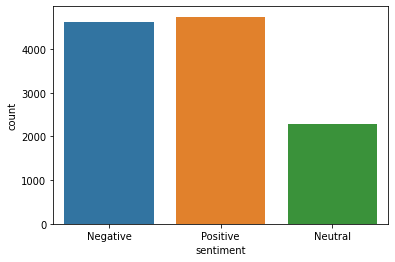

In [63]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [83]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Uttar Pradesh/congress_UP.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

18617

In [84]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [86]:
word_emotion=dict()
for i in range(0,18617):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [68]:
from numpy import nan
nan == nan


False

In [69]:
for i in range(0,131):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

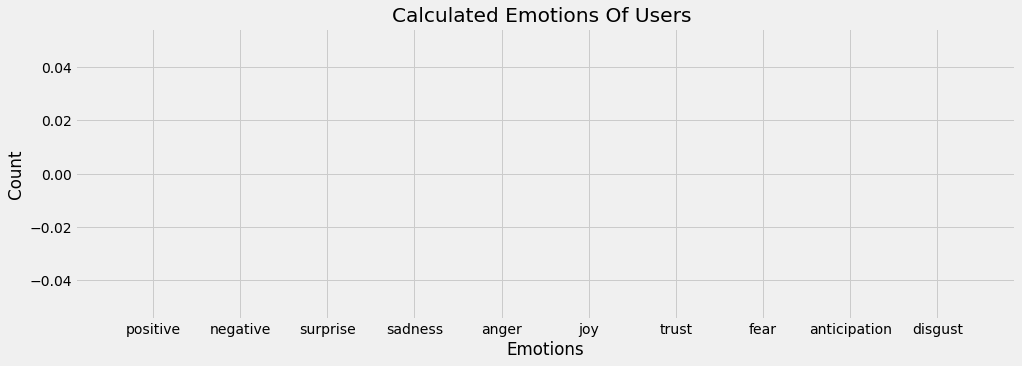

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [87]:
df.Location  = df.Location.fillna('India')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [88]:
df.Location = df.Location.apply(lambda x: x.replace('Uttar Pradesh','India'))
df.Location.value_counts()

                               4251
USA                             448
Washington, DC                  198
India                           179
South Florida 305-240-8468       81
                               ... 
Shiga, Japan                      1
Actor in Hollywoodland            1
USA. 🗽                            1
Montgomery, Alabama               1
Peoria IL                         1
Name: Location, Length: 3338, dtype: int64

In [89]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:59:42,1330299881219649536,False,Do nothing senate? Seriously? @SpeakerPelosi p...,LisaLafern,,Twitter for iPhone,0,13,166,0,"[noth, senat, seriou, plea, explain, ole, cong...",,Negative,21,0
1,2020-11-21 23:56:39,1330299116241506307,False,Returning to the #JCPOA means a return to the ...,TelStratLLC,California State of Mind,Twitter Web App,0,21,322,0,"[return, jcpoa, mean, return, pre, trump, nucl...",California State of Mind,Positive,21,2
2,2020-11-21 23:56:26,1330299060943802377,False,A child on a double murder charge? For congres...,raytrevisan,Sydney,Twitter for Android,0,66,179,0,"[child, doubl, murder, charg, congress, realli...",Sydney,Negative,21,0
3,2020-11-21 23:55:00,1330298699881254914,False,@SimonTemplarPV The one guy who’s been kicking...,garysteveneaton,SoCal,Twitter for iPhone,1,3420,1456,0,"[one, guy, who, kick, ass, alleg, teammat, con...",SoCal,Negative,21,0
4,2020-11-21 23:54:55,1330298677878001664,False,@CBS_Herridge @SFF_K2 CONGRESS WOULD NOT ALLOW...,DrKevinJMaloney,Mamaroneck New York,Twitter Web App,1,29,275,1,"[congress, would, allow, governor, cuomo, new,...",Mamaroneck New York,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,2020-11-15 12:07:48,1327946398591946752,False,If @asadowaisi is a #VoteCutter then what is @...,itsvikasreddy,,Twitter for Android,0,34,25,1,"[votecutt, bihar, orissa, congress, gut, conte...",,Neutral,15,1
11644,2020-11-15 12:05:38,1327945856146923520,False,@mtgreenee Gurl I can’t wait for Congress to s...,prahme,NewYork on my mind,Twitter for iPhone,0,75,366,0,"[gurl, cant, wait, congress, start, wear, mask...",NewYork on my mind,Positive,15,2
11645,2020-11-15 12:04:33,1327945582875455488,False,@AOC @LindseyGrahamSC @AOC you have been in Co...,marian_olivei,,Twitter for Android,0,3,43,0,"[congress, year, yet, suppli, solut, creat, jo...",,Negative,15,0
11646,2020-11-15 12:00:02,1327944444906262529,False,The Trump administration is stepping back from...,CEDuncan70,"North Carolina, USA",Twitter Web App,0,513,2763,0,"[trump, administr, step, back, negoti, new, st...",North Carolina,Negative,15,0


In [73]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [74]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 23:59:42,1330299881219649536,False,Do nothing senate? Seriously? @SpeakerPelosi p...,LisaLafern,,Twitter for iPhone,0,13,166,0,"[noth, senat, seriou, plea, explain, ole, cong...",,Negative,21
1,2020-11-21 23:56:39,1330299116241506307,False,Returning to the #JCPOA means a return to the ...,TelStratLLC,California State of Mind,Twitter Web App,0,21,322,0,"[return, jcpoa, mean, return, pre, trump, nucl...",California State of Mind,Positive,21
2,2020-11-21 23:56:26,1330299060943802377,False,A child on a double murder charge? For congres...,raytrevisan,Sydney,Twitter for Android,0,66,179,0,"[child, doubl, murder, charg, congress, realli...",Sydney,Negative,21
3,2020-11-21 23:55:00,1330298699881254914,False,@SimonTemplarPV The one guy who’s been kicking...,garysteveneaton,SoCal,Twitter for iPhone,1,3420,1456,0,"[one, guy, who, kick, ass, alleg, teammat, con...",SoCal,Negative,21
4,2020-11-21 23:54:55,1330298677878001664,False,@CBS_Herridge @SFF_K2 CONGRESS WOULD NOT ALLOW...,DrKevinJMaloney,Mamaroneck New York,Twitter Web App,1,29,275,1,"[congress, would, allow, governor, cuomo, new,...",Mamaroneck New York,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


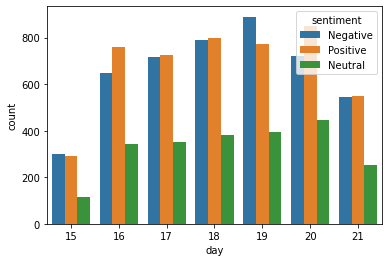

In [75]:
sns.countplot(df['day'],hue = df['sentiment'])

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [77]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:59:42,1330299881219649536,False,Do nothing senate? Seriously? @SpeakerPelosi p...,LisaLafern,,Twitter for iPhone,0,13,166,0,"[noth, senat, seriou, plea, explain, ole, cong...",,Negative,21,0
1,2020-11-21 23:56:39,1330299116241506307,False,Returning to the #JCPOA means a return to the ...,TelStratLLC,California State of Mind,Twitter Web App,0,21,322,0,"[return, jcpoa, mean, return, pre, trump, nucl...",California State of Mind,Positive,21,2
2,2020-11-21 23:56:26,1330299060943802377,False,A child on a double murder charge? For congres...,raytrevisan,Sydney,Twitter for Android,0,66,179,0,"[child, doubl, murder, charg, congress, realli...",Sydney,Negative,21,0
3,2020-11-21 23:55:00,1330298699881254914,False,@SimonTemplarPV The one guy who’s been kicking...,garysteveneaton,SoCal,Twitter for iPhone,1,3420,1456,0,"[one, guy, who, kick, ass, alleg, teammat, con...",SoCal,Negative,21,0
4,2020-11-21 23:54:55,1330298677878001664,False,@CBS_Herridge @SFF_K2 CONGRESS WOULD NOT ALLOW...,DrKevinJMaloney,Mamaroneck New York,Twitter Web App,1,29,275,1,"[congress, would, allow, governor, cuomo, new,...",Mamaroneck New York,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,2020-11-15 12:07:48,1327946398591946752,False,If @asadowaisi is a #VoteCutter then what is @...,itsvikasreddy,,Twitter for Android,0,34,25,1,"[votecutt, bihar, orissa, congress, gut, conte...",,Neutral,15,1
11644,2020-11-15 12:05:38,1327945856146923520,False,@mtgreenee Gurl I can’t wait for Congress to s...,prahme,NewYork on my mind,Twitter for iPhone,0,75,366,0,"[gurl, cant, wait, congress, start, wear, mask...",NewYork on my mind,Positive,15,2
11645,2020-11-15 12:04:33,1327945582875455488,False,@AOC @LindseyGrahamSC @AOC you have been in Co...,marian_olivei,,Twitter for Android,0,3,43,0,"[congress, year, yet, suppli, solut, creat, jo...",,Negative,15,0
11646,2020-11-15 12:00:02,1327944444906262529,False,The Trump administration is stepping back from...,CEDuncan70,"North Carolina, USA",Twitter Web App,0,513,2763,0,"[trump, administr, step, back, negoti, new, st...",North Carolina,Negative,15,0


In [90]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [80]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [92]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [93]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7510729613733905
Precision Score:  0.7510729613733905
Recall Score:  0.7510729613733905
F1 Score:  0.7510729613733906


In [95]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [ ]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [96]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [ ]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

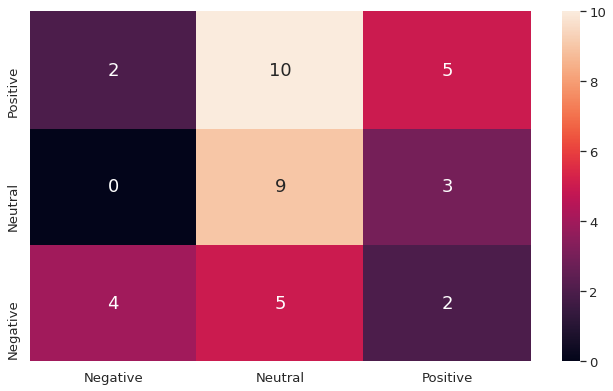

In [ ]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [ ]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [ ]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.475
Precision Score:  0.475
Recall Score:  0.475
F1 Score:  0.47500000000000003


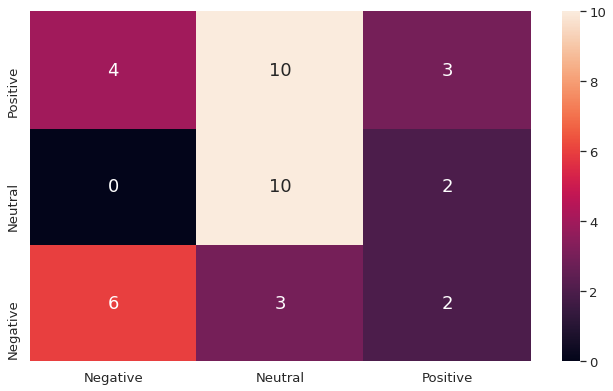

In [ ]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [ ]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.632, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.444, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.500, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.556, total=   0.7s
[CV] n_estimators=500, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=500, max_depth=5, criterion=gini, score=0.667, total=   0.7s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.579, total=   1.9s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.500, total=   1.8s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.2s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.500, total=   1.9s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.0s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.611, total=   1.8s
[CV] n_estimators=1400, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.9s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=2, criterion=gini, score=0.611, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.684, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.500, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.611, total=   1.8s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.500, total=   1.9s
[CV] n_estimators=1300, max_depth=11, criterion=gini .................
[CV]  n_estimators=1300, max_depth=11, criterion=gini, score=0.722, total=   1.8s
[CV] n_estimators=800, max_depth=17, criterion=gini ..................
[CV]  n_estimators=800, max_depth=17, criterion=gini, score=0.684, total=   1.1s
[C

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


0.6035087719298246
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5
Precision Score:  0.5
Recall Score:  0.5
F1 Score:  0.5


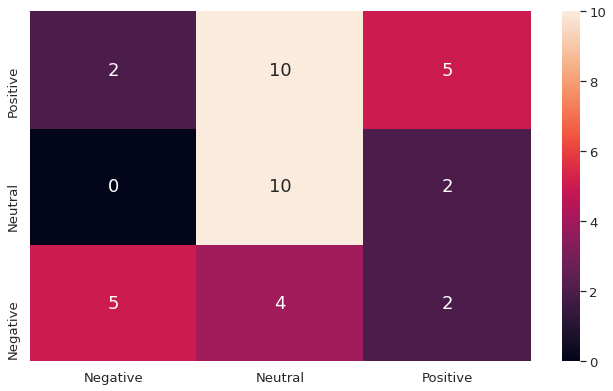

In [ ]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [ ]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.575
Precision Score:  0.575
Recall Score:  0.575
F1 Score:  0.575


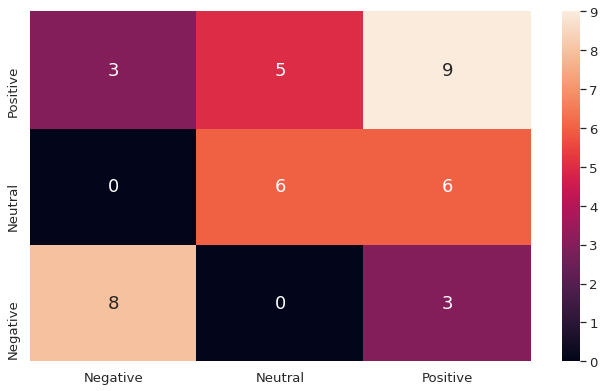

In [ ]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [ ]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [ ]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5355555555555556
{'alpha': 2, 'class_prior': None, 'fit_prior': True}


In [ ]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.575
Precision Score:  0.575
Recall Score:  0.575
F1 Score:  0.575


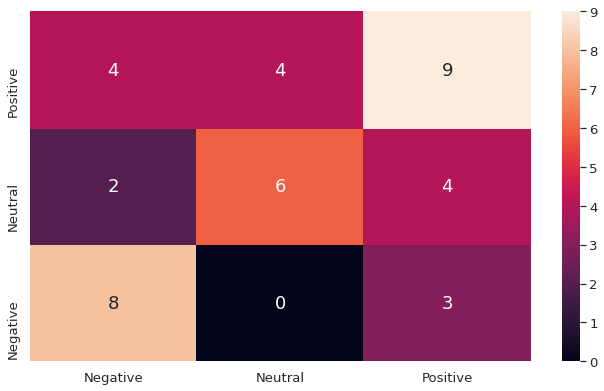

In [ ]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

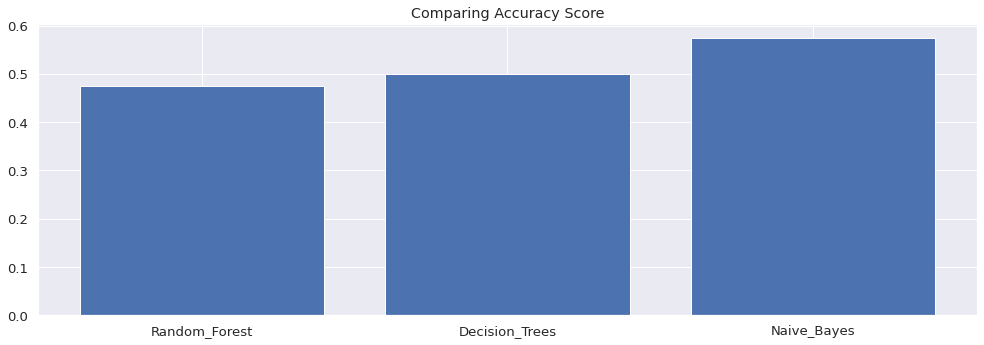

In [ ]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

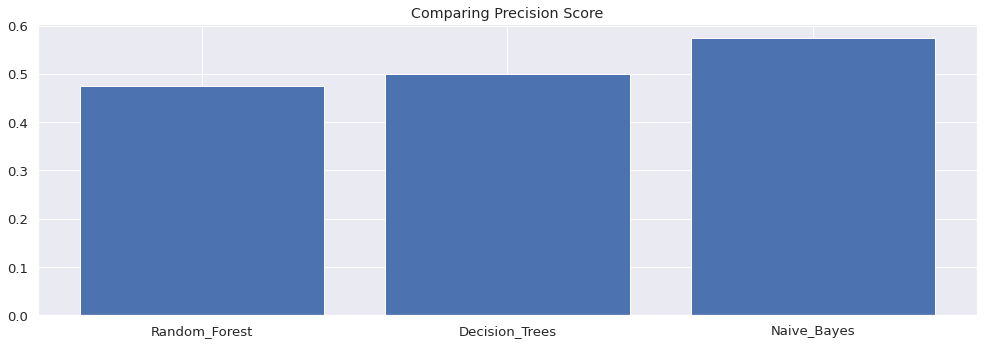

In [ ]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

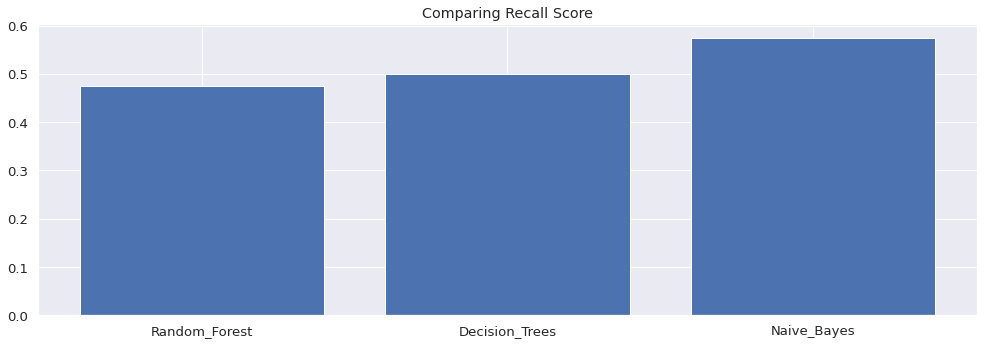

In [ ]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

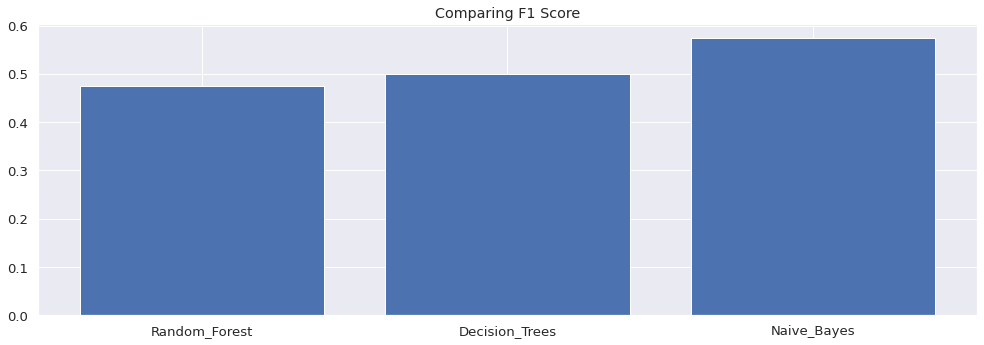

In [ ]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()